<a href="https://colab.research.google.com/github/giyuntf2/1day1commit/blob/main/pytorch/DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Load

Dataset과 DataLoader를 제공하고, 이를 사용하면 '미니 배치 학습', '데이터 셔플', '병렬 처리'까지 간단히 수행이 가능하다.

사용 방법은 Dataset을 정의하고 DataLoader에 전달하는 것이다.

처음에는 
Input : Tensor,
Ouptut : Dataset 형태로 변환해주는 TensorDataset을 사용

In [32]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [37]:
# TensorDataset, DataLoader 임포트
from torch.utils.data import TensorDataset, DataLoader, Dataset

In [20]:
#cuda 선언
if torch.cuda.is_available():
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    print("Using cuda :", torch.cuda.get_device_name(0))

torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Using cuda : Tesla P100-PCIE-16GB


device(type='cuda')

# 데이터 함수로 불러오기


In [33]:
train_images = np.random.randint(256, size=(20, 32, 32, 3)) #갯수, 이미지크기, 채널스
train_labels = np.random.randint(2, size=(20, 1))

print(train_images.shape, train_labels.shape)

(20, 32, 32, 3) (20, 1)


In [58]:
class TensorData(Dataset):
    # 외부에 있는 데이터를 가져오기 위해 외부에서 데이터가 들어올 수 있도록, x_data, y_data 변수를 지정
    def __init__(self, x_data, y_data):
        #들어온 x는 tensor형태로 변환
        self.x_data = torch.FloatTensor(x_data)
        # tensor data의 형태는 (배치사이즈, 채널사이즈, 이미지 너비, 높이)의 형태임
        # 따라서 들어온 데이터의 형식을 permute함수를 활용하여 바꾸어주어야함.
        self.x_data = self.x_data.permute(0,3,1,2)  # 인덱스 번호로 바꾸어주는 것 # 이미지 개수, 채널 수, 이미지 너비, 높이
        self.y_data = torch.LongTensor(y_data) # float tensor / long tensor 로 숫자 속성을 정해줄 수 있음
        self.len = self.y_data.shape[0]

    # x,y를 튜플형태로 바깥으로 내보내기
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [63]:
train_data = TensorData(train_images, train_labels)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True, generator=torch.Generator(device='cuda'))

In [64]:
train_data[0][0].size()

torch.Size([3, 32, 32])

In [65]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.size()

torch.Size([10, 3, 32, 32])

In [ ]:
"""
DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)
"""

In [21]:
x_train  =  torch.cuda.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])

y_train = torch.cuda.FloatTensor([[152], [185], [180], [196], [142]])

In [22]:
#TensorDataset의 입력으로 사용하고 dataset으로 저장

dataset = TensorDataset(x_train, y_train)

# Dataset 선언 후 DataLoader

pytorch의 dataset을 만들었다면, DataLoader 사용이 가능하다. 

DataLoader는 기본적으로 2개의 인자를 입력받는다. 하나는 DataSet, Mini-Batch의 Size이다. 이때, Mini-Batch의 크기는 통상적으로 2의 배수를 사용한다. 

그리고, shuffle=True를 선택하면 Epoch마다 데이터를 섞어서 데이터가 학습되는 순서를 바꾼다.

In [23]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, generator=torch.Generator(device='cuda'))

model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 


In [27]:
epochs = 20

for epoch in range(epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        #print(batch_idx)
        #print(samples)

        x_train, y_train = samples

        prediction = model(x_train)

        cost = F.mse_loss(prediction, y_train)
        print(cost.item())
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} batch {}/{} cost: {:.6f}'.format(epoch, epochs, batch_idx+1, len(dataloader), cost.item()))

2.3596863746643066
Epoch    0/20 batch 1/3 cost: 2.359686
0.7096964716911316
Epoch    0/20 batch 2/3 cost: 0.709696
5.7485504150390625
Epoch    0/20 batch 3/3 cost: 5.748550
2.2139174938201904
Epoch    1/20 batch 1/3 cost: 2.213917
1.7395894527435303
Epoch    1/20 batch 2/3 cost: 1.739589
1.8002550601959229
Epoch    1/20 batch 3/3 cost: 1.800255
1.9844841957092285
Epoch    2/20 batch 1/3 cost: 1.984484
2.5380349159240723
Epoch    2/20 batch 2/3 cost: 2.538035
1.0252736806869507
Epoch    2/20 batch 3/3 cost: 1.025274
2.8707170486450195
Epoch    3/20 batch 1/3 cost: 2.870717
1.6710705757141113
Epoch    3/20 batch 2/3 cost: 1.671071
1.3847230672836304
Epoch    3/20 batch 3/3 cost: 1.384723
2.9578652381896973
Epoch    4/20 batch 1/3 cost: 2.957865
1.9044151306152344
Epoch    4/20 batch 2/3 cost: 1.904415
0.7984127402305603
Epoch    4/20 batch 3/3 cost: 0.798413
2.9157533645629883
Epoch    5/20 batch 1/3 cost: 2.915753
1.8844114542007446
Epoch    5/20 batch 2/3 cost: 1.884411
0.819188535213

In [30]:
new_var = torch.cuda.FloatTensor([[73, 80, 75]])
pred_y = model(new_var)

print(pred_y)

tensor([[153.5952]], grad_fn=<AddmmBackward0>)


# Mnist 활용

image(1, 28, 28)

label = 10개

- root는 학습 / 테스트 데이터가 저장되는 경로
- train은 학습용 또는 테스트용 데이터셋 여부 지정
- download=True는 root에 데이터가 없는 경우 인터넷에서 다운로드
- transform과 target_transform은 feature와 label의 transform을 지정

In [66]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [69]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [70]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

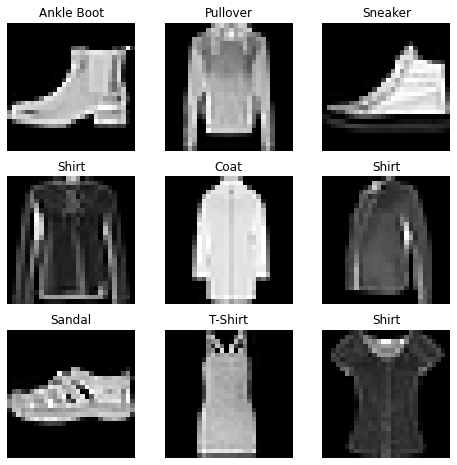

In [71]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

__getitem__ 함수는 주어진 인덱스 idx 에 해당하는 샘플을 데이터셋에서 불러오고 반환. 인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, read_image 를 사용하여 이미지를 텐서로 변환하고, self.img_labels 의 csv 데이터로부터 해당하는 정답(label)을 가져오고, (해당하는 경우) 변형(transform) 함수들을 호출한 뒤, 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환.

In [73]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'lable'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transfrom = target_transform

    def len(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [75]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True, generator=torch.Generator(device='cuda'))
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True, generator=torch.Generator(device='cuda'))

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


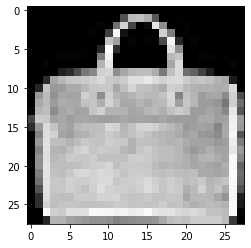

Label: 8


In [78]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")